In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #

In [23]:
def ploting(df, 변수, n):
    sns.distplot(df[변수]) ## 선그래프 생성
    if n==1:
        plt.title(변수, fontsize=20)
    elif n==2:
        plt.title(변수+" 로그변환", fontsize=20)
    plt.show()

In [24]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/H2MJRE.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [25]:
data = pd.read_csv("더미포함 행정동1.csv", encoding="utf-8-sig")
data

,일자,행정동명,사업체수,세대수,세대당 인구,남여 비율,단독주택,창고시설,제2종근린생활시설,제1종근린생활시설,...,요일_목,요일_수,요일_월,요일_일,요일_토,요일_화,분기_1,분기_2,분기_3,분기_4
0,2018-01-01,건입동,849,4324,2.27,1.08,219,24,41,55,...,0,0,1,0,0,0,1,0,0,0
1,2018-01-02,건입동,849,4324,2.27,1.08,219,24,41,55,...,0,0,0,0,0,1,1,0,0,0
2,2018-01-03,건입동,849,4324,2.27,1.08,219,24,41,55,...,0,1,0,0,0,0,1,0,0,0
3,2018-01-04,건입동,849,4324,2.27,1.08,219,24,41,55,...,1,0,0,0,0,0,1,0,0,0
4,2018-01-05,건입동,849,4324,2.27,1.08,219,24,41,55,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47244,2021-06-26,효돈동,355,2316,2.27,1.02,1353,395,119,122,...,0,0,0,0,1,0,0,1,0,0
47245,2021-06-27,효돈동,355,2316,2.27,1.02,1353,395,119,122,...,0,0,0,1,0,0,0,1,0,0
47246,2021-06-28,효돈동,355,2316,2.27,1.02,1353,395,119,122,...,0,0,1,0,0,0,0,1,0,0
47247,2021-06-29,효돈동,355,2316,2.27,1.02,1353,395,119,122,...,0,0,0,0,0,1,0,1,0,0


In [26]:
군집df=pd.read_csv("행정동1 군집화 label5.csv", encoding="utf-8-sig")
행정동0=[]
행정동1=[]
행정동2=[]
행정동3=[]
행정동4=[]
for i in range(len(군집df)):
    if 군집df.loc[i, 'label']==0:
        행정동0.append(군집df.loc[i, '행정동명'])
    if 군집df.loc[i, 'label']==1:
        행정동1.append(군집df.loc[i, '행정동명'])
    if 군집df.loc[i, 'label']==2:
        행정동2.append(군집df.loc[i, '행정동명'])
    if 군집df.loc[i, 'label']==3:
        행정동3.append(군집df.loc[i, '행정동명'])
    if 군집df.loc[i, 'label']==4:
        행정동4.append(군집df.loc[i, '행정동명']) 

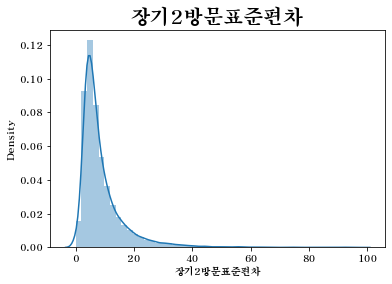

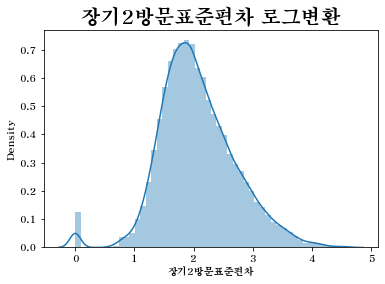

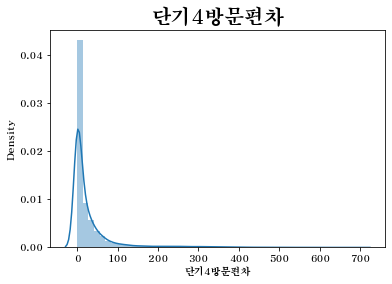

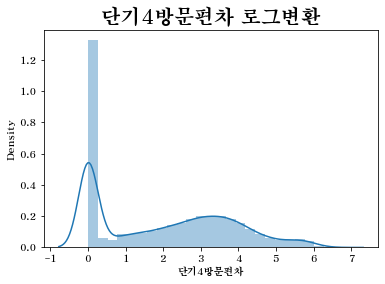

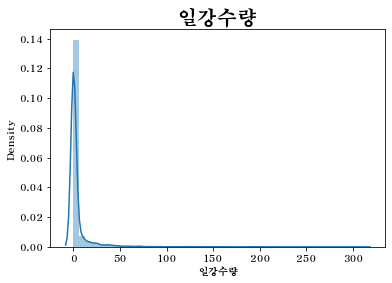

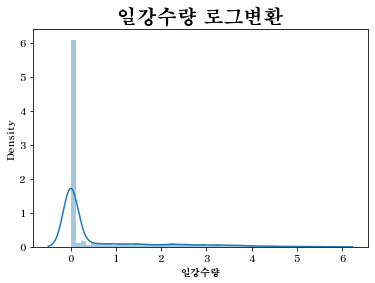

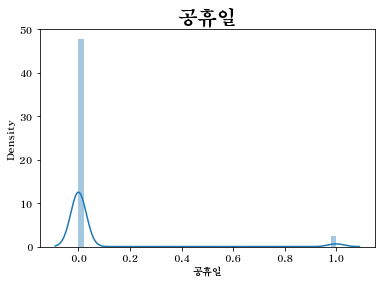

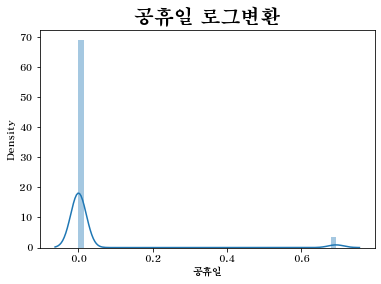

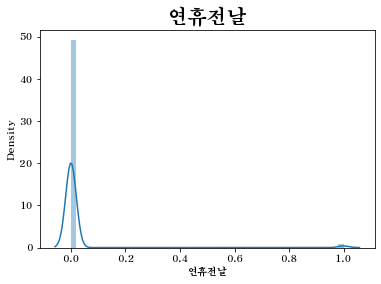

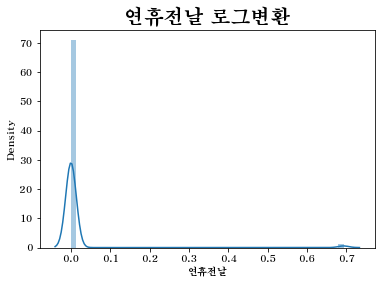

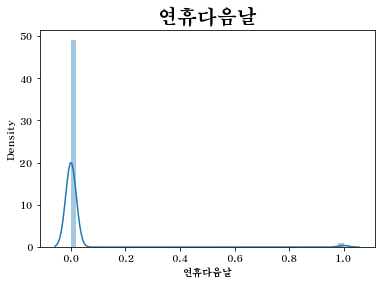

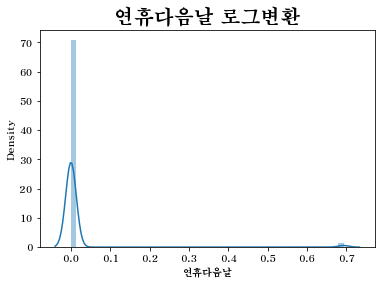

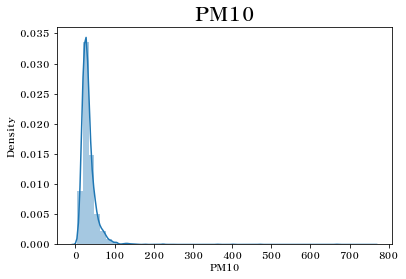

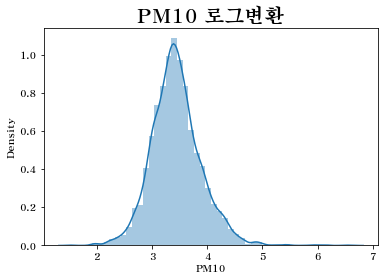

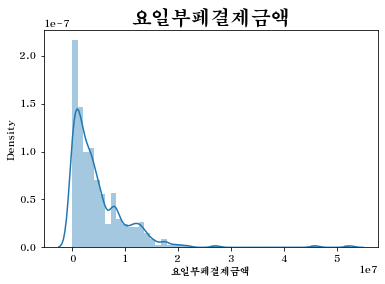

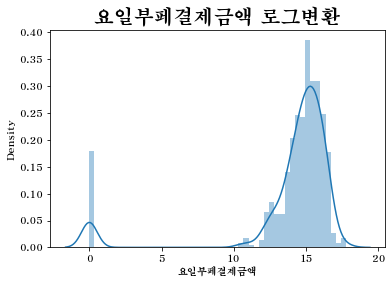

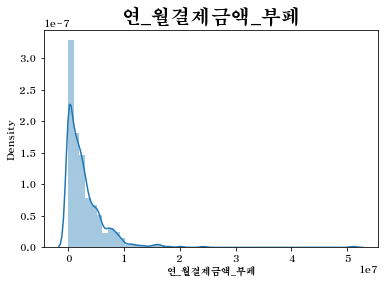

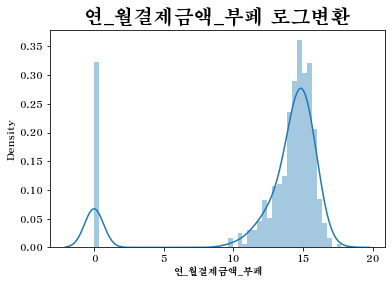

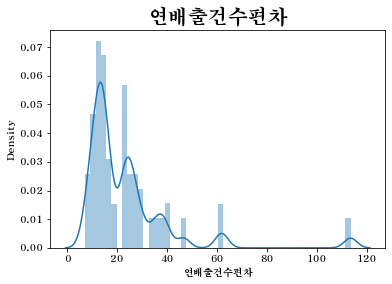

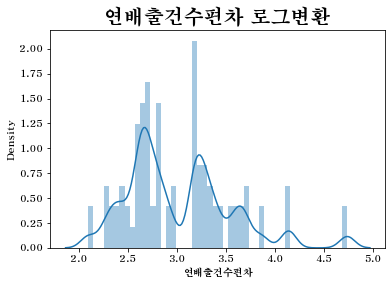

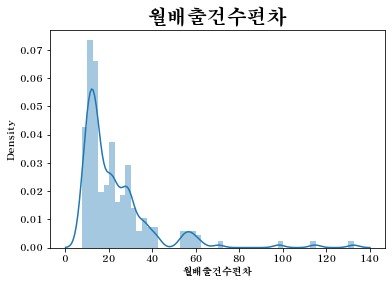

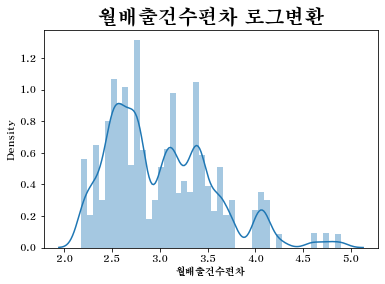

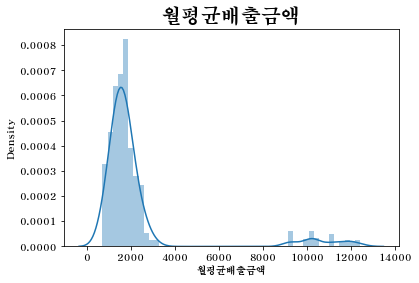

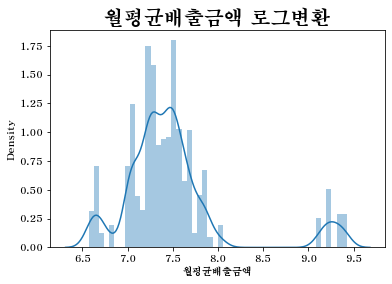

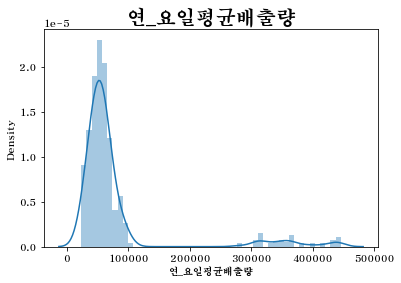

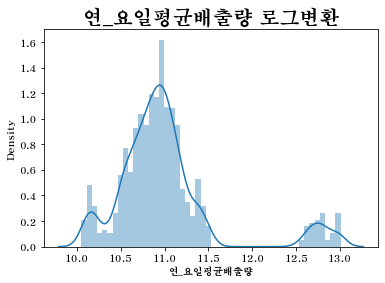

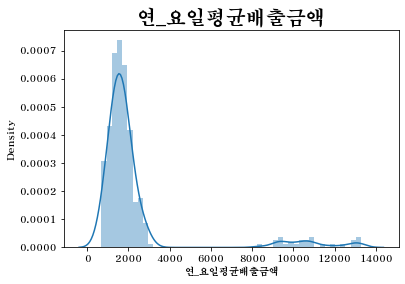

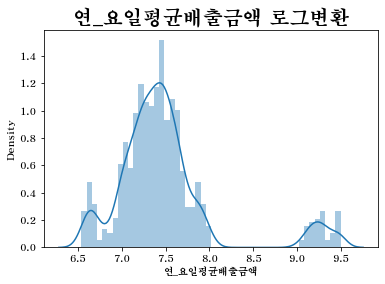

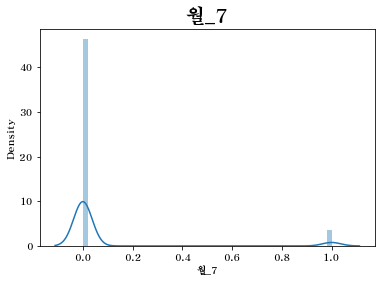

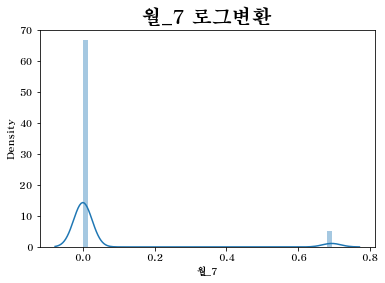

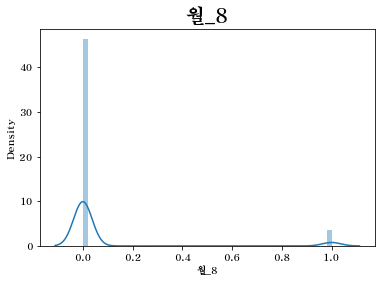

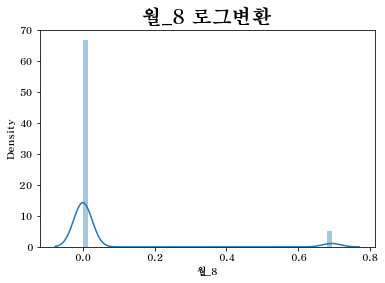

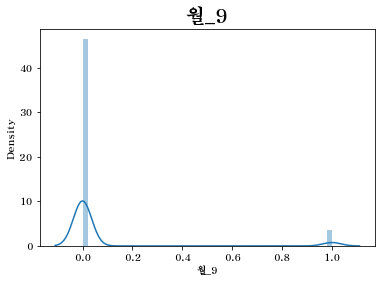

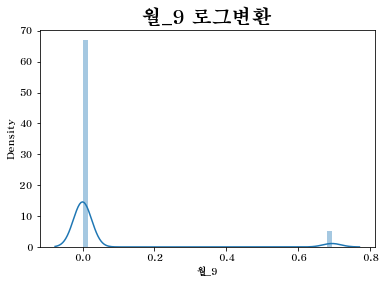

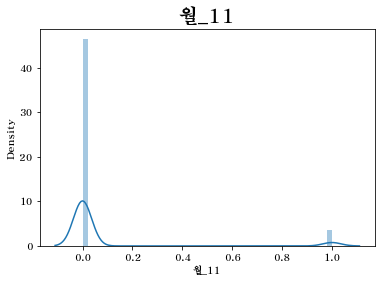

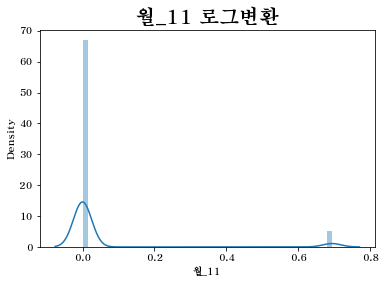

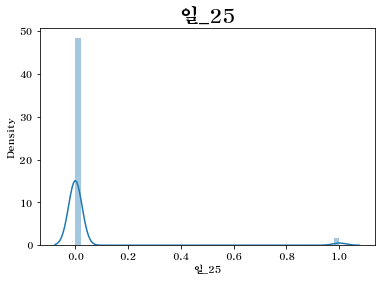

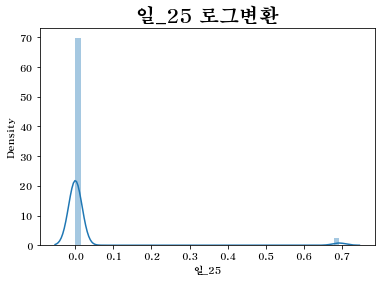

['장기2방문표준편차', '단기4방문편차', '일강수량', '공휴일', '연휴전날', '연휴다음날', 'PM10', '요일부페결제금액', '연_월결제금액_부페', '연배출건수편차', '월배출건수편차', '월평균배출금액', '연_요일평균배출량', '연_요일평균배출금액', '월_7', '월_8', '월_9', '월_11', '일_25'] 19


In [27]:
data_행정동0 = pd.concat([data[data["행정동명"] == i] for i in 행정동0],axis=0).reset_index(drop=True)
label0=np.load("행정동1 label 별 선택변수/행정동1 label 0 선택변수.npy")
label0_=list(set(list(data_행정동0.columns))-set(label0)-{'배출량'})
df_every = data_행정동0.drop(label0_,axis=1)
df=df_every.drop(["배출량"],axis=1)
df1=df.copy()
loglist=[]
for val in list(df1.columns):
    if abs(df1[val].skew())>3:
        loglist.append(val)
        ploting(df1, val, 1)
        df1[val] = np.log1p(df1[val])
        ploting(df1, val, 2)
print(loglist, len(loglist))

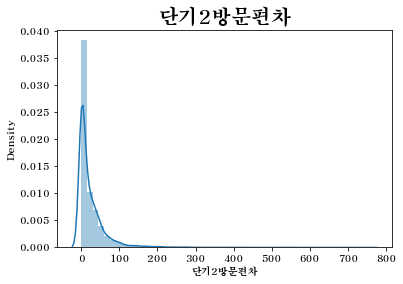

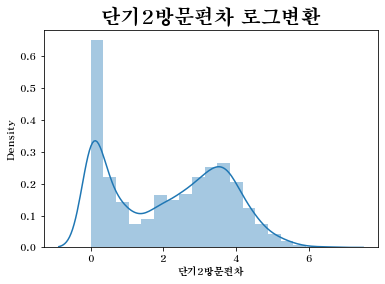

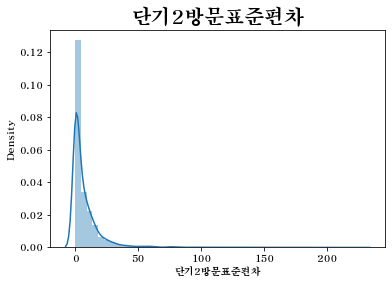

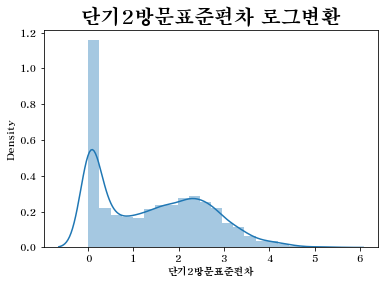

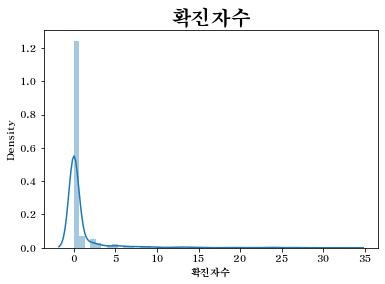

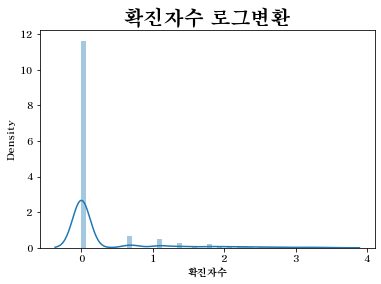

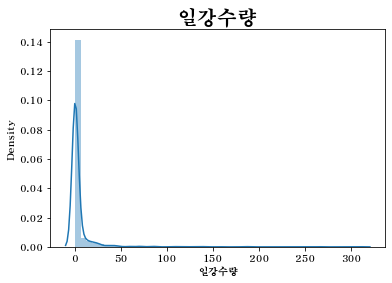

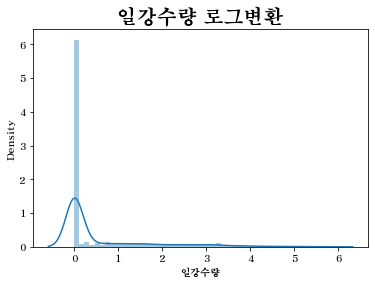

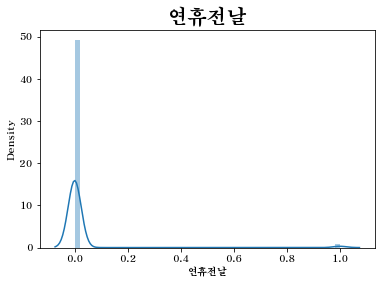

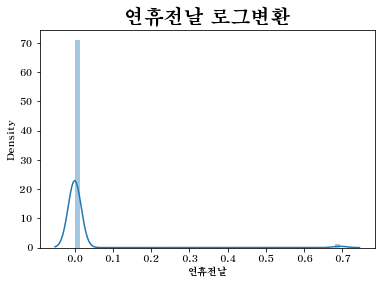

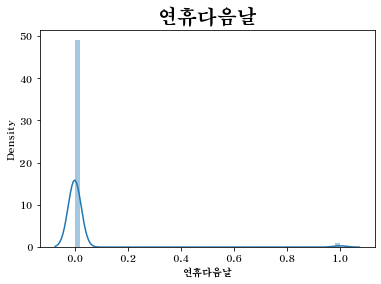

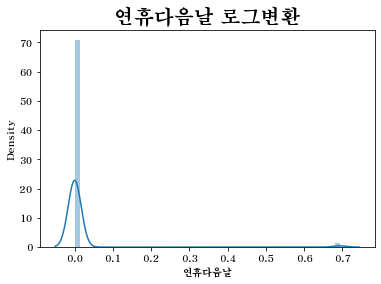

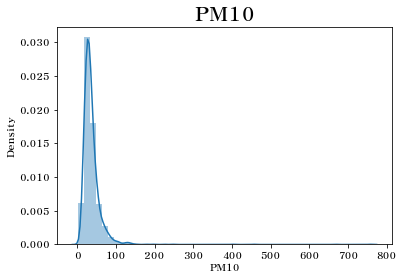

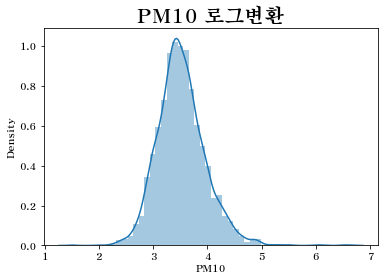

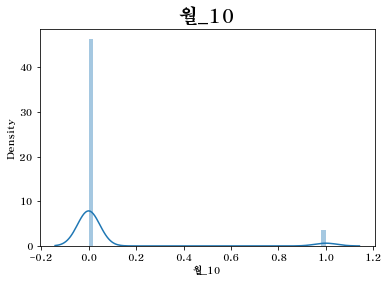

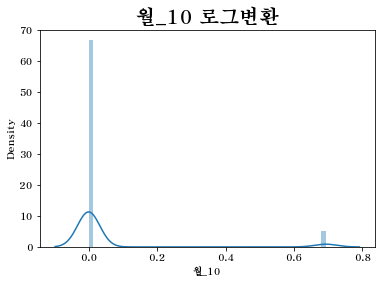

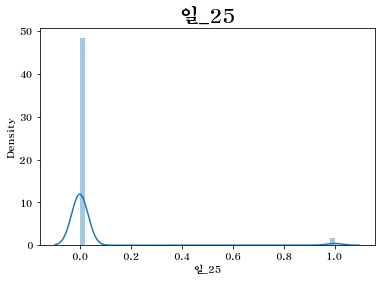

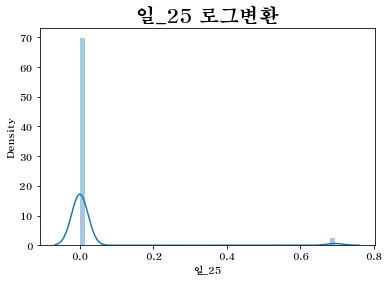

['단기2방문편차', '단기2방문표준편차', '확진자수', '일강수량', '연휴전날', '연휴다음날', 'PM10', '월_10', '일_25'] 9


In [28]:
data_행정동1 = pd.concat([data[data["행정동명"] == i] for i in 행정동1],axis=0).reset_index(drop=True)
label1=np.load("행정동1 label 별 선택변수/행정동1 label 1 선택변수.npy")
label1_=list(set(list(data_행정동1.columns))-set(label1)-{'배출량'})
df_every = data_행정동1.drop(label1_,axis=1)
df=df_every.drop(["배출량"],axis=1)
df1=df.copy()
loglist=[]
for val in list(df1.columns):
    if abs(df1[val].skew())>3:
        loglist.append(val)
        ploting(df1, val, 1)
        df1[val] = np.log1p(df1[val])
        ploting(df1, val, 2)
print(loglist, len(loglist))

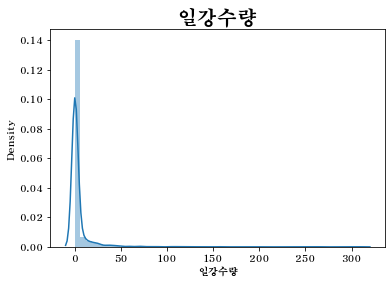

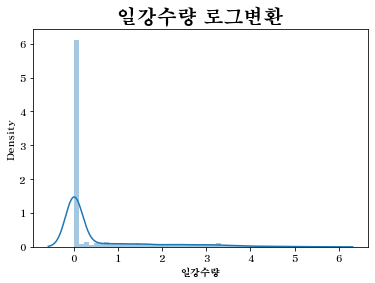

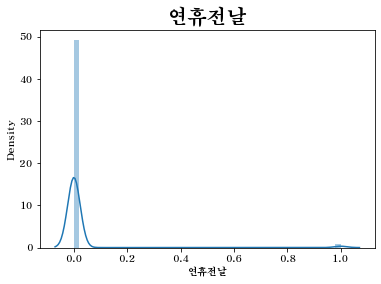

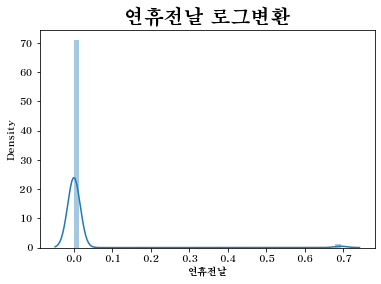

['일강수량', '연휴전날'] 2


In [29]:
data_행정동2 = pd.concat([data[data["행정동명"] == i] for i in 행정동2],axis=0).reset_index(drop=True)
label2=np.load("행정동1 label 별 선택변수/행정동1 label 2 선택변수.npy")
label2_=list(set(list(data_행정동2.columns))-set(label2)-{'배출량'})
df_every = data_행정동2.drop(label2_,axis=1)
df=df_every.drop(["배출량"],axis=1)
df1=df.copy()
loglist=[]
for val in list(df1.columns):
    if abs(df1[val].skew())>3:
        loglist.append(val)
        ploting(df1, val, 1)
        df1[val] = np.log1p(df1[val])
        ploting(df1, val, 2)
print(loglist, len(loglist))

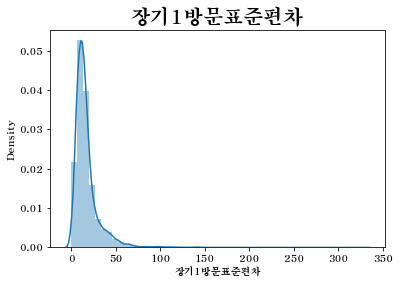

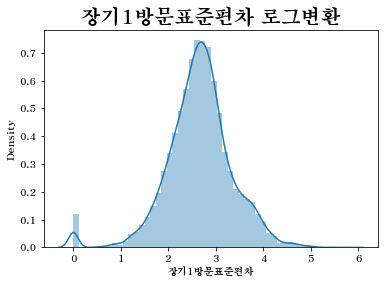

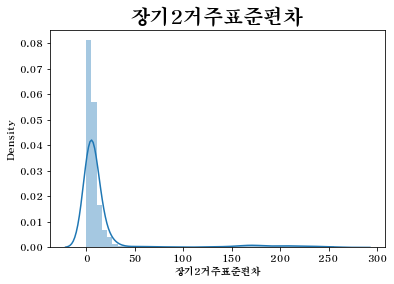

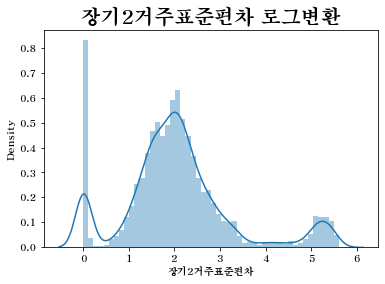

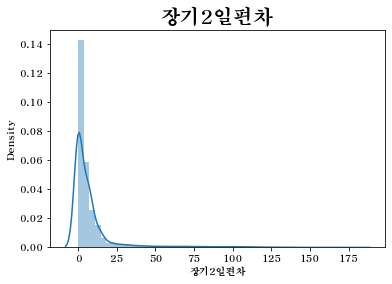

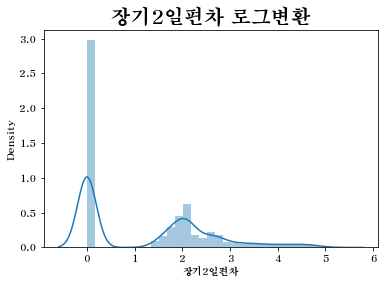

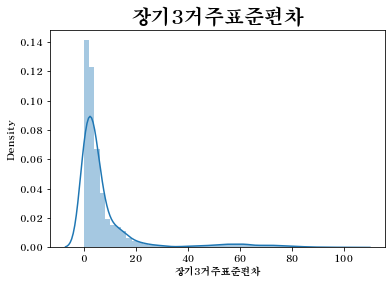

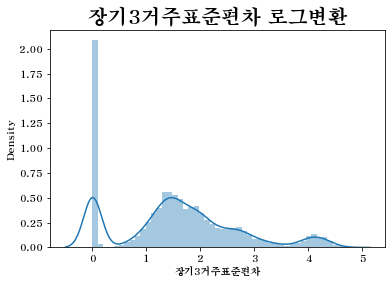

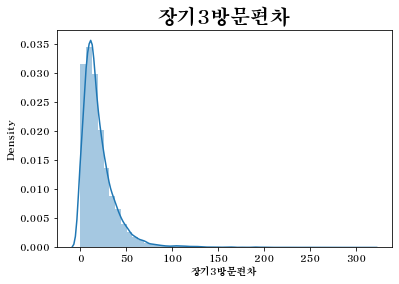

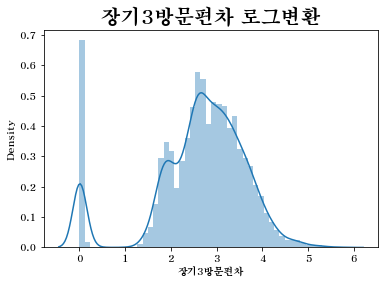

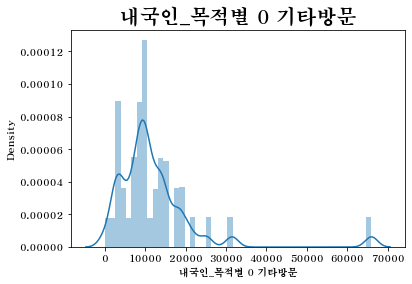

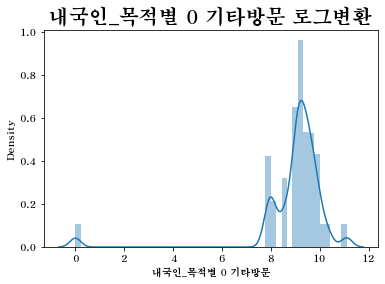

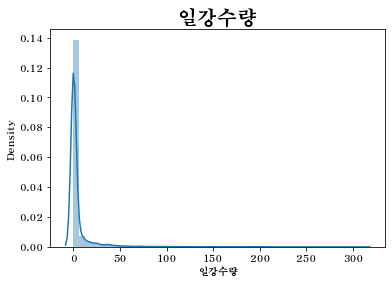

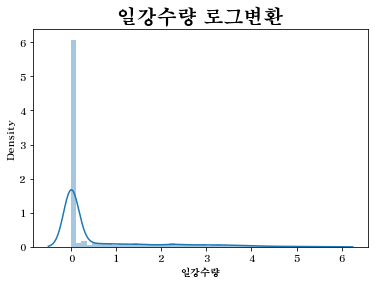

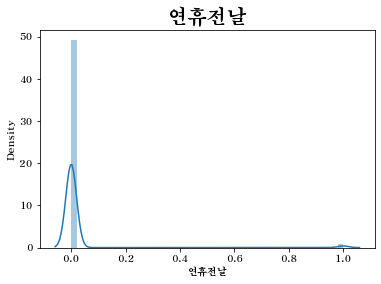

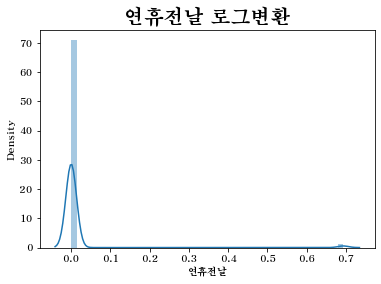

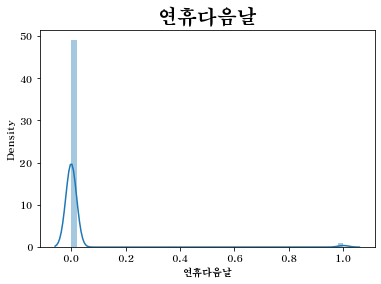

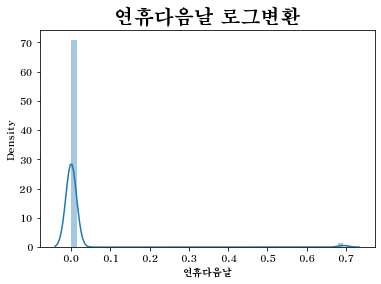

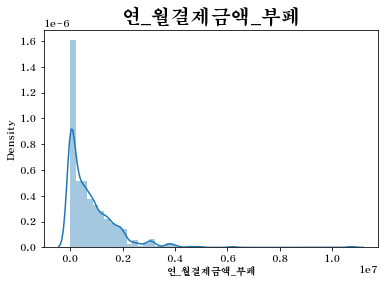

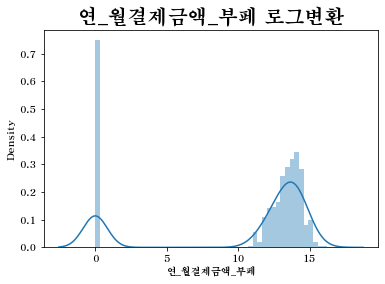

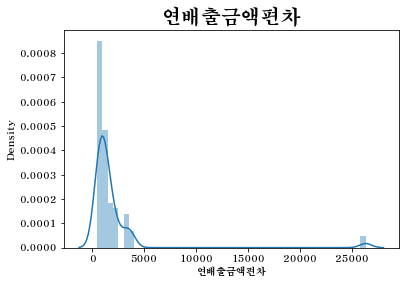

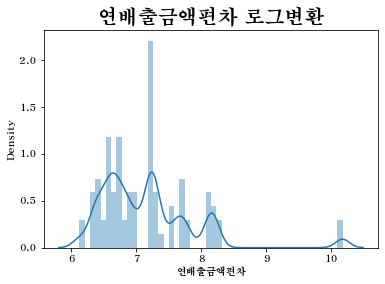

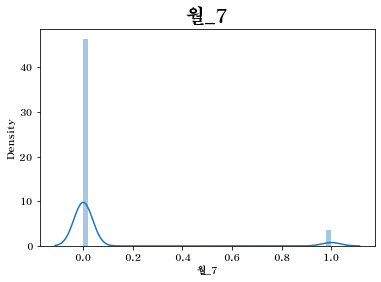

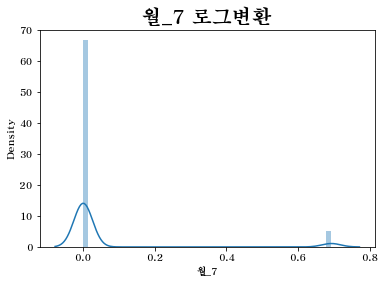

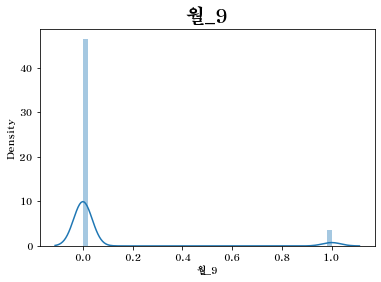

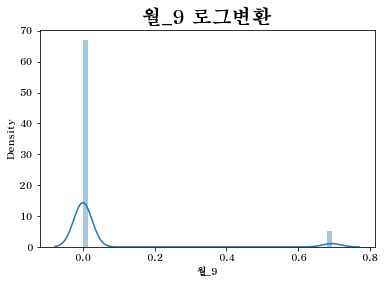

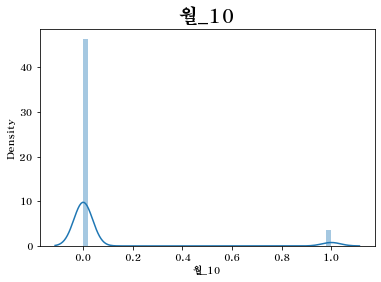

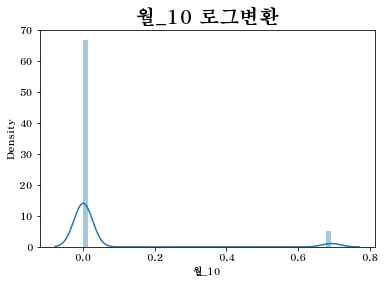

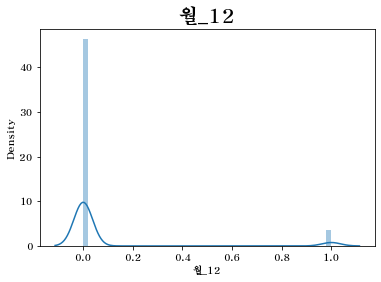

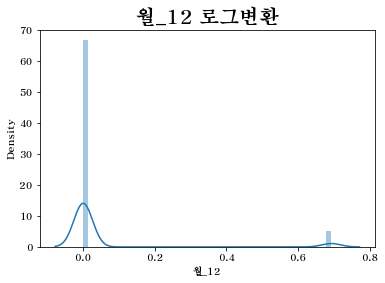

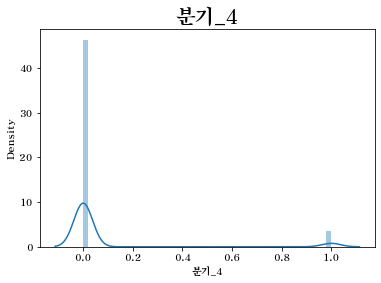

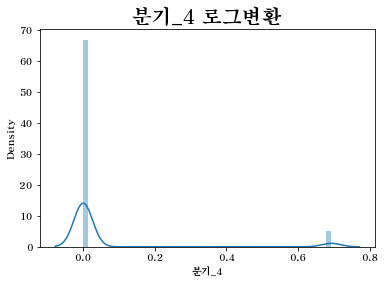

['장기1방문표준편차', '장기2거주표준편차', '장기2일편차', '장기3거주표준편차', '장기3방문편차', '내국인_목적별 0 기타방문', '일강수량', '연휴전날', '연휴다음날', '연_월결제금액_부페', '연배출금액편차', '월_7', '월_9', '월_10', '월_12', '분기_4'] 16


In [30]:
data_행정동3 = pd.concat([data[data["행정동명"] == i] for i in 행정동3],axis=0).reset_index(drop=True)
label3=np.load("행정동1 label 별 선택변수/행정동1 label 3 선택변수.npy")
label3_=list(set(list(data_행정동3.columns))-set(label3)-{'배출량'})
df_every = data_행정동3.drop(label3_,axis=1)
df=df_every.drop(["배출량"],axis=1)
df1=df.copy()
loglist=[]
for val in list(df1.columns):
    if abs(df1[val].skew())>3:
        loglist.append(val)
        ploting(df1, val, 1)
        df1[val] = np.log1p(df1[val])
        ploting(df1, val, 2)
print(loglist, len(loglist))

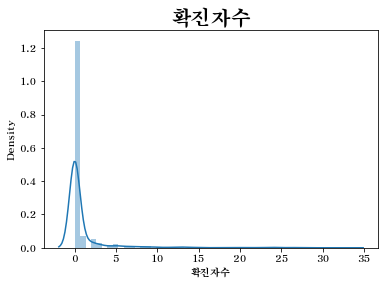

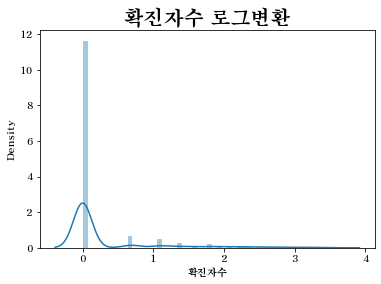

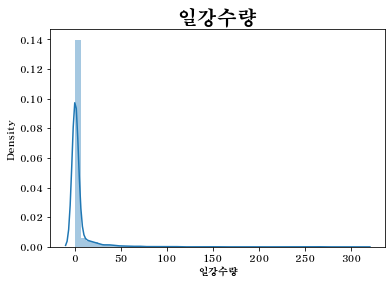

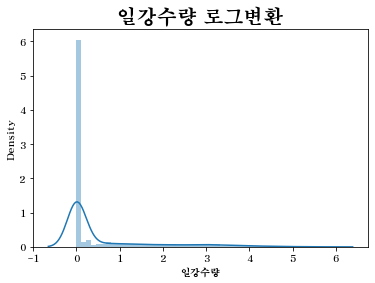

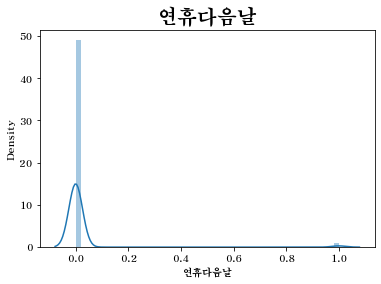

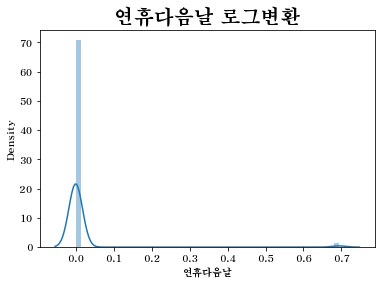

['확진자수', '일강수량', '연휴다음날'] 3


In [31]:
data_행정동4 = pd.concat([data[data["행정동명"] == i] for i in 행정동4],axis=0).reset_index(drop=True)
label4=np.load("행정동1 label 별 선택변수/행정동1 label 4 선택변수.npy")
label4_=list(set(list(data_행정동4.columns))-set(label4)-{'배출량'})
df_every = data_행정동4.drop(label4_,axis=1)
df=df_every.drop(["배출량"],axis=1)
df1=df.copy()
loglist=[]
for val in list(df1.columns):
    if abs(df1[val].skew())>3:
        loglist.append(val)
        ploting(df1, val, 1)
        df1[val] = np.log1p(df1[val])
        ploting(df1, val, 2)
print(loglist, len(loglist))

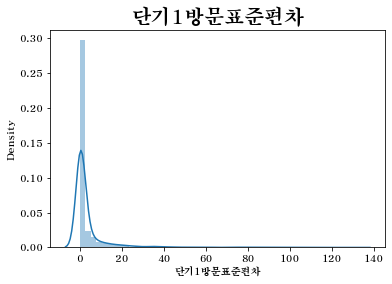

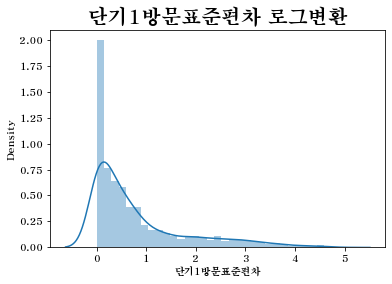

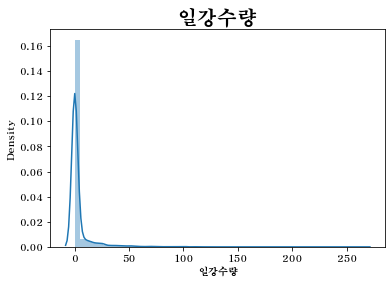

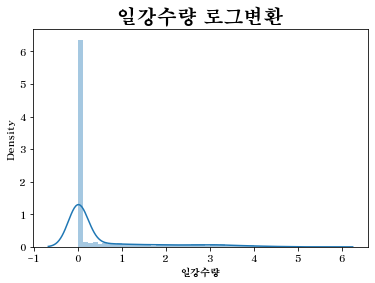

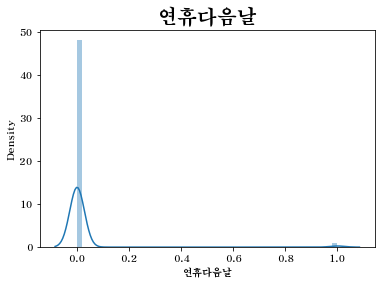

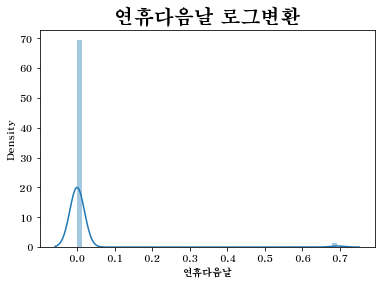

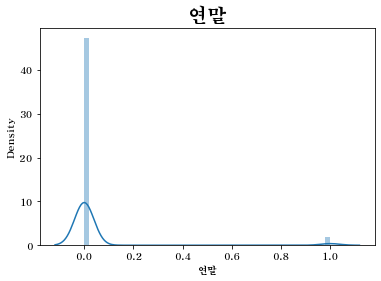

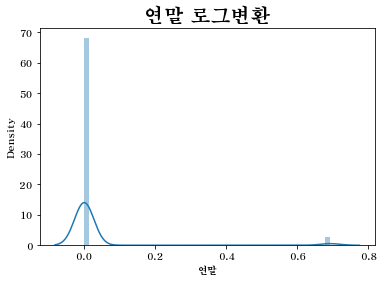

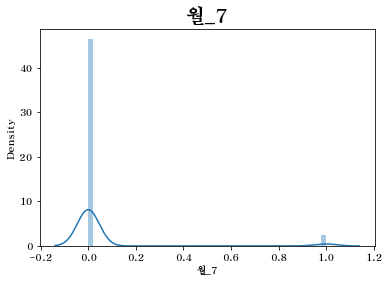

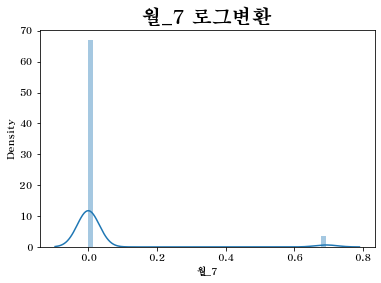

['단기1방문표준편차', '일강수량', '연휴다음날', '연말', '월_7'] 5


In [32]:
data2 = pd.read_csv("더미포함 행정동2.csv", encoding="utf-8-sig")
label=np.load("행정동2 선택변수.npy")
label_=list(set(list(data2.columns))-set(label)-{'배출량'})
df_every = data2.drop(label_,axis=1)
df=df_every.drop(["배출량"],axis=1)
df1=df.copy()
loglist=[]
for val in list(df1.columns):
    if abs(df1[val].skew())>3:
        loglist.append(val)
        ploting(df1, val, 1)
        df1[val] = np.log1p(df1[val])
        ploting(df1, val, 2)
print(loglist, len(loglist))